### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [3]:
w1 = np.array([[2,6],[3,4],[3,8],[4,6]])
w2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

### Train-data

In [4]:
train_X = pd.DataFrame(np.concatenate((w1,w2),axis=0))
train_y = np.array([0] * 4 + [1] * 4)

In [5]:
print(train_X)

   0  1
0  2  6
1  3  4
2  3  8
3  4  6
4  3  0
5  1 -2
6  3 -4
7  5 -2


In [6]:
print(train_y)

[0 0 0 0 1 1 1 1]


### Bayes Classifier

In [7]:
#function to find covariance matrix
def covariance_matrix(data):
    mean_vector = np.mean(data, axis=0)
    z_matrix = data - mean_vector
    cov_matrix = np.dot(z_matrix.T, z_matrix) / (data.shape[0] - 1)
    return cov_matrix

In [8]:
def fit_bayes_classifier(train_X, train_y):
    classes = np.unique(train_y)
    cov_mats, cov_dets = {}, {}
    inv_cov_mats = {}
    mean_vectors = {}
    apriori = {}
    for c in classes:
        apriori[c] = len(train_y[train_y == c]) / len(train_y)
        mean_vectors[c] = np.array(train_X[train_y == c].mean())
        cov_mats[c] = covariance_matrix(np.array(train_X[train_y == c]))
        cov_dets[c] = np.linalg.det(cov_mats[c])
        inv_cov_mats[c] = np.linalg.inv(cov_mats[c])
    return cov_dets, inv_cov_mats, apriori, mean_vectors

def predict(apriori, mean_vectors, cov_dets, inv_cov_mats, train_X, train_y, test_point):
    classes = np.unique(train_y)
    dimensions = train_X.shape[1]
    class_probabilities = {}

    for c in classes:
        req_vector = np.array(test_point) - mean_vectors[c]
        numerator = np.exp(-0.5 * np.dot(np.dot(req_vector.T, inv_cov_mats[c]), req_vector))
        denominator = np.power(2 * np.pi, dimensions / 2) * np.power(cov_dets[c], 0.5)
        class_probabilities[c] = apriori * (numerator / denominator)

    return max(zip(class_probabilities.values(), class_probabilities.keys()))[1]

In [9]:
def fit_discriminant_function(train_y, cov_dets, inv_cov_mats, p_w, mean_vectors):
    classes = np.unique(train_y)
    A, B, C = [0]*len(classes), [0]*len(classes), [0]*len(classes)
    for c in classes:
        A[c] = (-1/2) * inv_cov_mats[c]
        B[c] = inv_cov_mats[c].dot(mean_vectors[c])
        C[c] = (-1/2) * mean_vectors[c].T.dot(inv_cov_mats[c]).dot(mean_vectors[c]) - (1/2) * np.log(cov_dets[c]) + np.log(p_w[c])
    
    return np.array(A), np.array(B), np.array(C)

In [10]:
cov_dets, inv_cov_mats, apriori, mean_vectors = fit_bayes_classifier(train_X, train_y)
apriori = {0: 0.5, 1: 0.5}

In [11]:
A, B, C = fit_discriminant_function(train_y, cov_dets, inv_cov_mats, apriori, mean_vectors)

In [12]:
g1 = lambda x: x.T.dot(A[0]).dot(x) + B[0].T.dot(x) + C[0]
g2 = lambda x: x.T.dot(A[1]).dot(x) + B[1].T.dot(x) + C[1]
g = lambda x: g1(x) - g2(x)

### Plotting

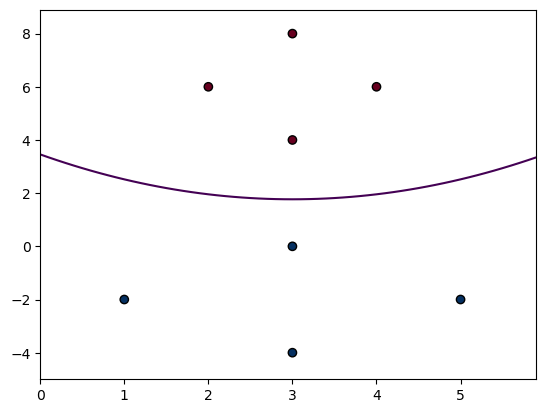

In [13]:
train_X = np.array(train_X)
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z[i, j] = g(np.array([xx[i, j], yy[i, j]]))
plt.contour(xx, yy, z, levels = [0])
plt.scatter(train_X[:, 0], train_X[:, 1], c = train_y, cmap = plt.cm.RdBu, edgecolor='k')
plt.show()